# Project 3
## Pritam Channawar

# Dataset Attributes

- Age : age [years]

- anaemia : Decrease of red blood cells or hemoglobin (boolean)

- creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)

- diabetes : If the patient has diabetes (boolean)

- ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)

- high_blood_pressure : If the patient has hypertension (boolean)

- platelets : Platelets in the blood (kiloplatelets/mL)

- serum_creatinine : Level of serum creatinine in the blood (mg/dL)

- serum_sodium : Level of serum sodium in the blood (mEq/L)

- sex : Woman or man (binary)

- smoking : If the patient smokes or not (boolean)

- time : Follow-up period (days)

- DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

#for visulization
import matplotlib.pyplot as plt

import seaborn as sns

#for spliting up the data
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/Users/ramtuptewar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Import data

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
0  75.0        0                       582         0                 20  \
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
0                    1  265000.00               1.9           130    1  \
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes   
count  299.000000  299.000000                299.000000  299.000000  \
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets   
count         299.000000           299.000000     299.000000  \
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time   
count         299.00000    299.000000  299.000000  299.00000  299.000000  \
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### All features are numerical

In [7]:
columns = df.columns
columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Check Null Values

In [8]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values

In [9]:
# List of all features with number of unique values present in them

df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

#### there are few catagorical features lets saperate them

In [10]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record
two_cat_features = []
string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'DEATH_EVENT']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'DEATH_EVENT']
continuous_features = []
for i in all_features:
    if df[i].nunique() != 2:
        continuous_features.append(i)
    else:
        two_cat_features.append(i)

print('All Features: ', all_features)
print('\nContinuous Features: ', continuous_features)
print('\nTwo category Features: ', two_cat_features)

All Features:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

Continuous Features:  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Two category Features:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


# Data Visualization 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("hls", 2)

DEATH_EVENT
0    203
1     96
dtype: int64


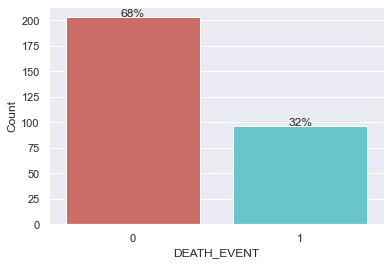

In [12]:
# lets visualize death count
print(df.groupby(['DEATH_EVENT']).size())
de_plot = sns.countplot(data=df, x='DEATH_EVENT', order=df.DEATH_EVENT.value_counts().index)
plt.ylabel('Count')
for p in de_plot.patches:
    height = p.get_height()
    de_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

The dataset is unbalanced with very low data points (299)
2 : 1 ratio for No Death Event cases : Death Event cases
Due to this, predictions will be biased towards No Death Event cases.
Visualizations will also display this bias, thus making it difficult to gain insight.

## Mean values of all the features

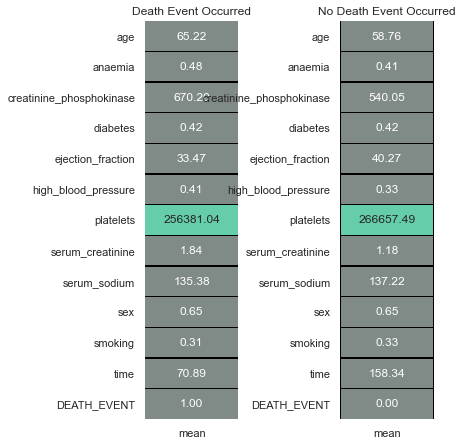

In [13]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T

colors = ['#808A87','#66CDAA']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

Mean values of all the features for cases of DEATH_EVENT and No DEATH_EVENT.

## Distribution of Numerical Features 

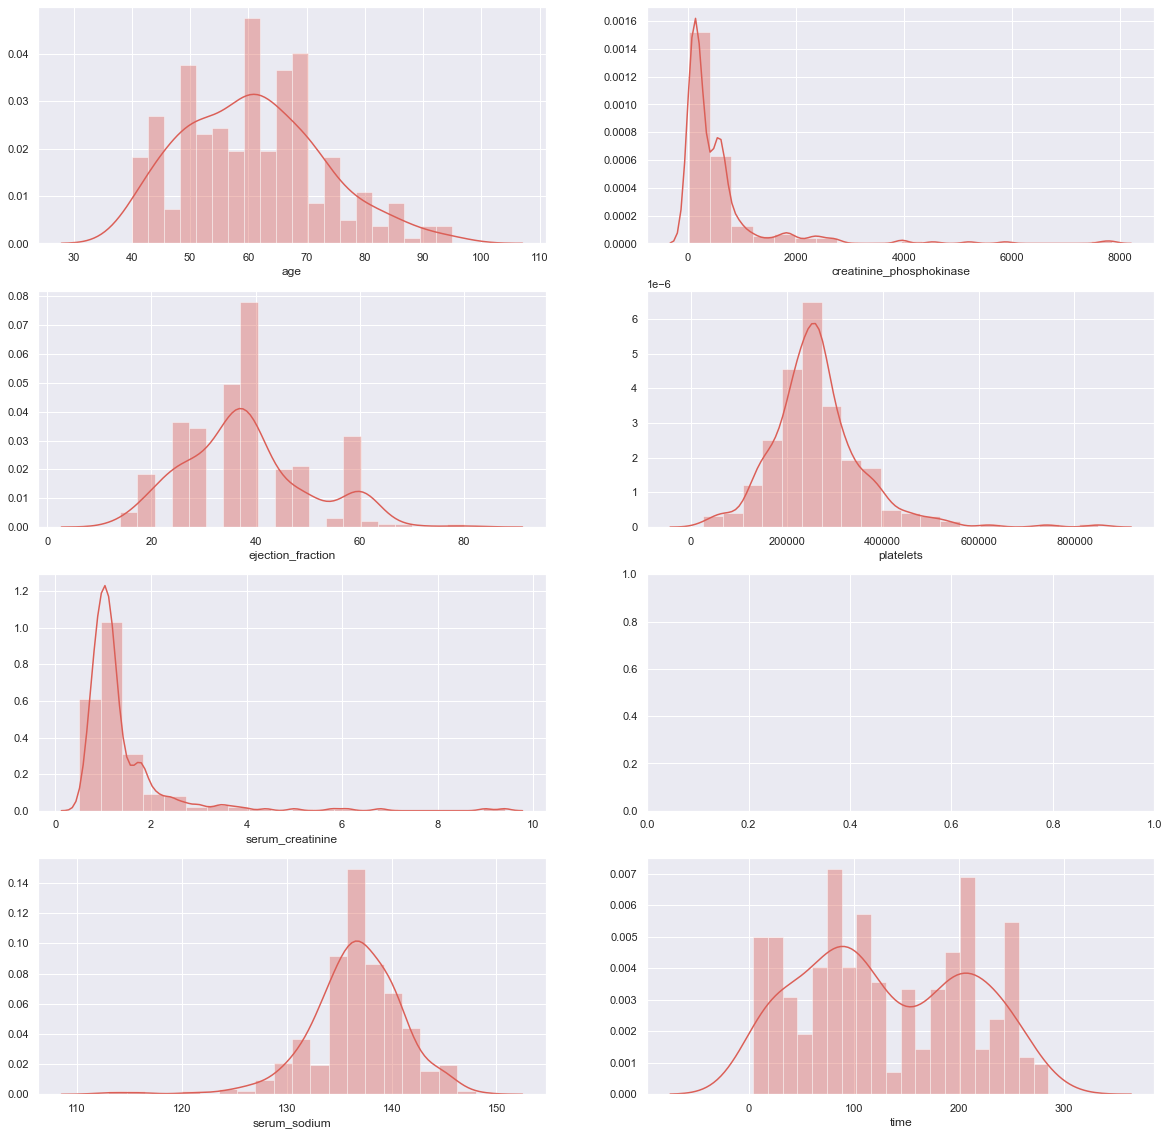

In [14]:
sns.set_palette("hls", )
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8) ) = plt.subplots(4, 2, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax7, ax8]
for i in range(len(continuous_features)):
    sns.distplot(df[continuous_features[i]], bins=20, hist=True, ax=ax[i])

- Age,Creatinine_Phosphokinase,Ejaction_Fraction and Serum_creatinine have a rightly or positively skewed data distribution.
- Platelets and Serum_Sodium are near about normally distributed.
- Time's data distribution is similar to a typical Time Series Analysis graph with irregularities present in it.

- The age distribution graph seems normally distributed with right-skewed, Also the smallest age is 40 years and the most frequent numbers are between 55–60
- Proportion of anemia graph, the proportion of anemia uninfected is bigger than anemia infected with 57%
- creatinine_phosphokinase distribution graph, the most frequent numbers are between 0–1000 and there are some outliers.
- Proportion of diabetes graph, the proportion of Non diabetics is bigger than diabetics with 58%
- Ejection_fraction distribution graph seems normally distributed, Also the most frequent values are between 30–40
- High_blood_pressure chart,the high pressure is smaller than no high pressure where high pressure values are around 110 and no high pressure values are around 190
- Platelets distribution graph, the most frequent numbers are between 200000–400000 and there are some outliers.
- Serum_creatinine distribution graph, the most frequent numbers are between 0–2 and there are some outliers.
- Serum_sodium distribution graph seems normally distributed with left-skewed, the most frequent numbers are between 135–140
- Proportion of sex graph, the proportion of women is bigger than men with 65%
- Proportion of smoking graph, we can see that the proportion of non-smokers is bigger than smokers with 68%
- Proportion of Death Event graph, the proportion of survival is bigger than died with 68%

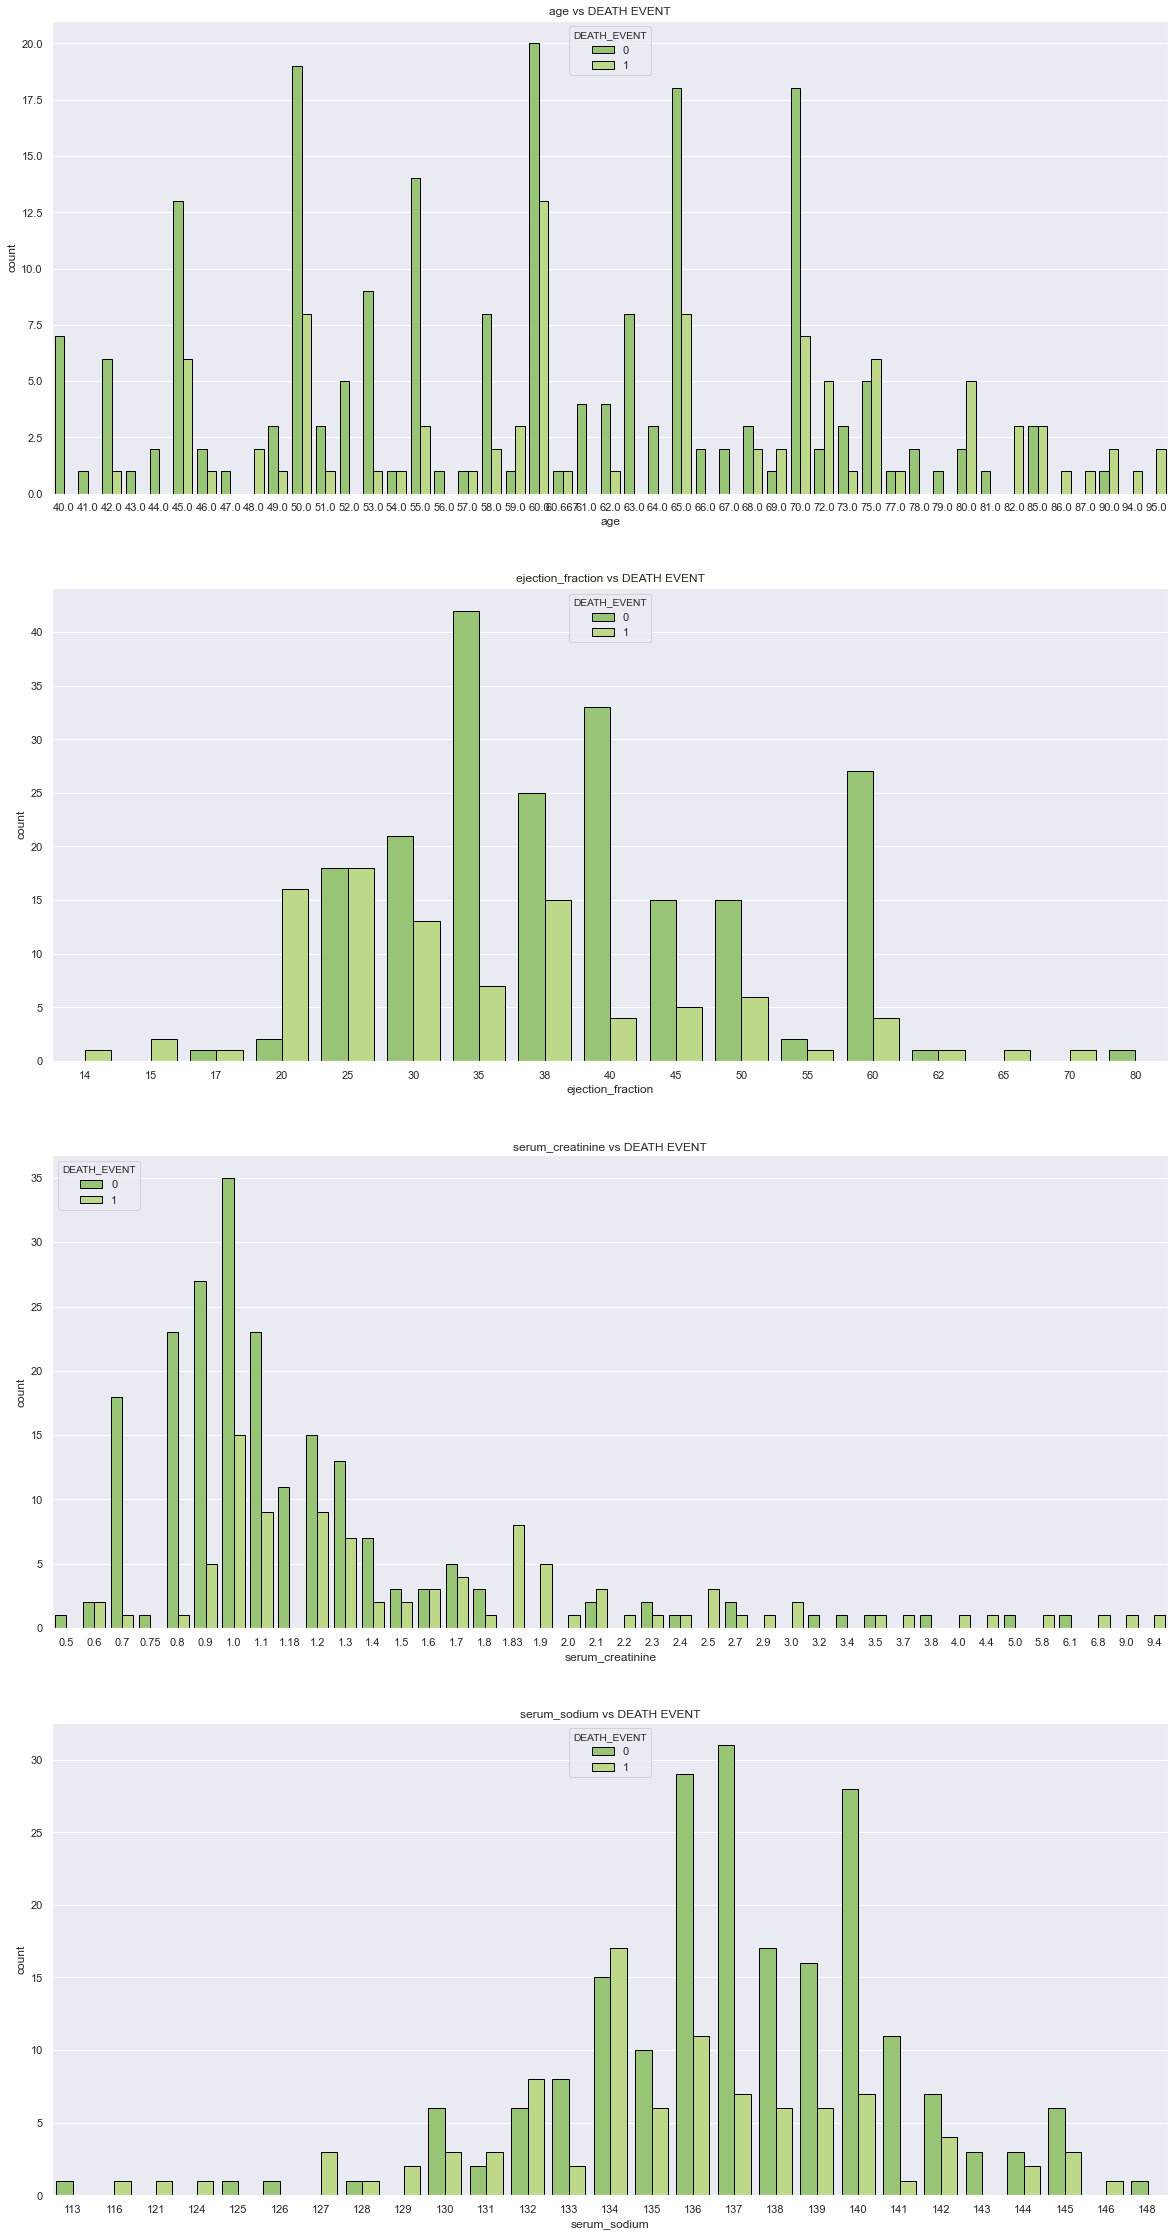

In [128]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features =  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']   
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,40),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(numerical_features[i],data = df,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title);

## Distribution of Categorical Features 

In [15]:
#f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 10))
#ax = [ax1, ax2, ax3, ax4, ax5]

#for i in range(len(two_cat_features)):
#    sns.countplot(x = two_cat_features[i], hue="DEATH_EVENT", data=df, ax=ax[i])

- All the graphs near about share the same pattern.
- According to the graphs, patients with negative cases of anaemia, diabetes, high_blood_pressure and smoking leads to - DEATH_EVENT more than the positive cases of these medical conditions.
- There are more cases cases of male population confronting a DEATH_EVENT due to heart failure than female population.

## Categorical Features vs Cases of DEATH_EVENT

In [17]:
anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

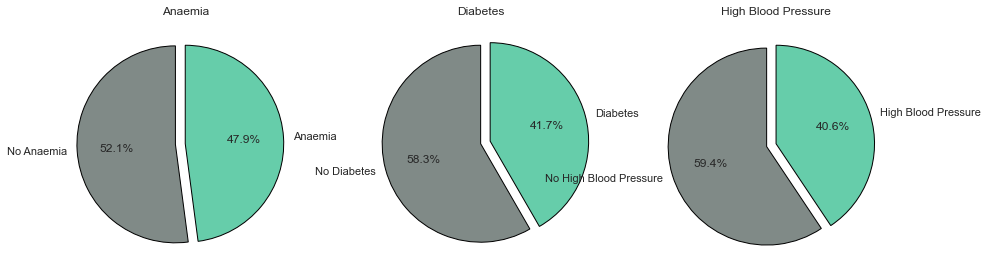

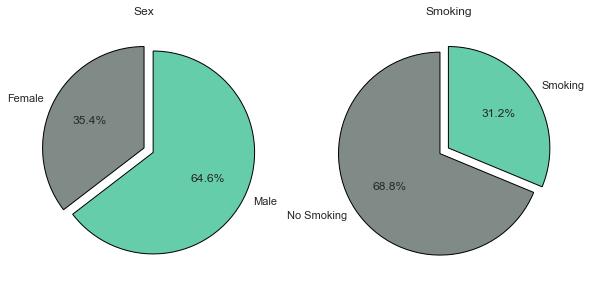

In [18]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

- These piecharts support the case for more DEATH_EVENT due to negative cases of anaemia, diabetes, high_blood_pressure and smoking than their positive counterparts.
- Out of the total cases of heart failure leading to DEATH_EVENT, males are more prone to it than females.

In [19]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


*************************
.: Sex (Gender) Total :.
*************************


sex
1    194
0    105
Name: count, dtype: int64

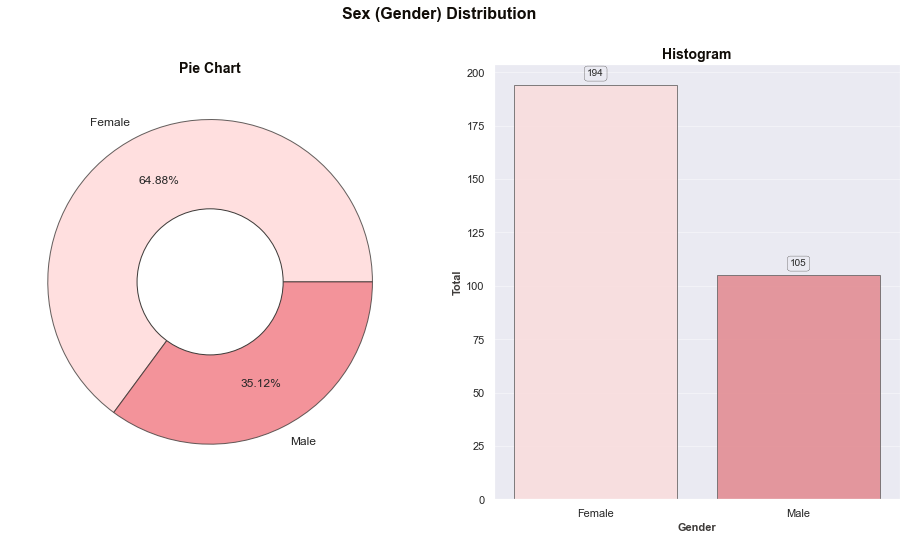

In [20]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

******************************
.: Smoking :.
******************************


smoking
0    203
1     96
Name: count, dtype: int64

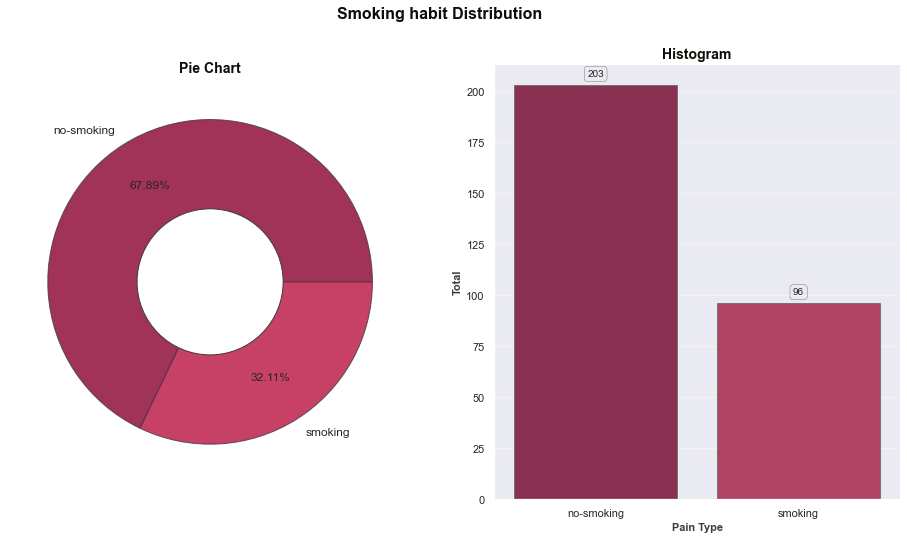

In [21]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:2]
labels=['no-smoking', 'smoking']
order=df['smoking'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Smoking habit Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['smoking'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='smoking', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Smoking :.'+'\033[0m')
print('*' * 30)
df.smoking.value_counts(dropna=False)

***********************************
.: Anaemia Total Patient :.
***********************************


anaemia
0    170
1    129
Name: count, dtype: int64

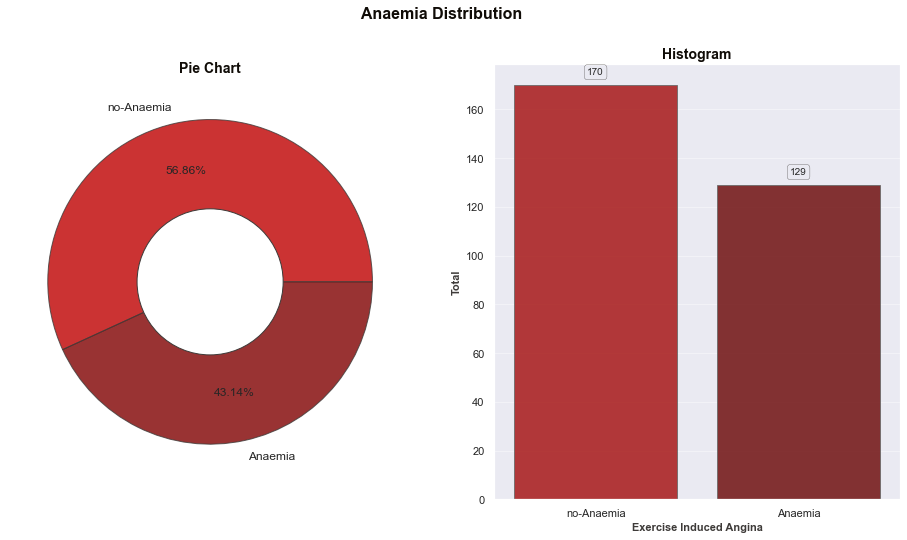

In [22]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['no-Anaemia', 'Anaemia']
order=df['anaemia'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle(' Anaemia Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['anaemia'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='anaemia', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Anaemia Total Patient :.'+'\033[0m')
print('*' * 35)
df.anaemia.value_counts(dropna=False)

### By reviewing the graphs we can get that:

- The age distribution graph seems normally distributed with right-skewed, Also the smallest age is 40 years and the most frequent numbers are between 55–60
- Proportion of anemia graph, the proportion of anemia uninfected is bigger than anemia infected with 57%
- creatinine_phosphokinase distribution graph, the most frequent numbers are between 0–1000 and there are some outliers.
- Proportion of diabetes graph, the proportion of Non diabetics is bigger than diabetics with 58%
- Ejection_fraction distribution graph seems normally distributed, Also the most frequent values are between 30–40
- High_blood_pressure chart,the high pressure is smaller than no high pressure where high pressure values are around 110 and no high pressure values are around 190
- Platelets distribution graph, the most frequent numbers are between 200000–400000 and there are some outliers.
- Serum_creatinine distribution graph, the most frequent numbers are between 0–2 and there are some outliers.
- Serum_sodium distribution graph seems normally distributed with lift-skewed, the most frequent numbers are between 135–140
- Proportion of sex graph, the proportion of women is bigger than men with 65%
- Proportion of smoking graph, we can see that the proportion of non-smokers is bigger than smokers with 68%
- Proportion of Death Event graph, the proportion of survival is bigger than died with 68%

Categorical Features :

anaemia : High chances of heart failures due to anaemia.
diabetes : High chances of heart failures due to diabetes.
high blood pressure : High chances with heart failures due to high blood pressure.
sex : male > female but by small margin are prone to more heart failures.
smoking : Smoking increases the chances of suffering from heart failures.
Numerical Features :

age : General aging leads to heart failures.
creatinine_phosphokinase : > 120 mcg/L
ejection_fraction : Normal Range 55% - 70%. Below 55% is prone to heart failures.
platelets : Low and very high values of platelets led to heart failure.
serum_creatinine : 0.8 - 1.7 (mg/dL) is the range of values that leads to most heart failures.
serum_sodium : Above 130 (mEq/L), chances of heart failure increases by alot.
time : Ideal follow-up period is of 14 days. Anything above 14 days can lead to worse situations.

All the information mentioned is gathered from websites and research papers. We will use this information for cross checking the summary of EDA and feature selection.

Conclusions obtained from the EDA contradict the Domain Information for the features : anaemia, diabetes and smoking.
This difference is probably because of low dataset size of 299 data points. Unbalanced dataset i.e 2 : 1 ratio of No DEATH_EVENT : DEATH_EVENT might also have some say in this

Thus, we will carry out the feature engineering process, balance the dataset using SMOTE analysis and feed the balanced to the ML algorithms.

# Check Outliers

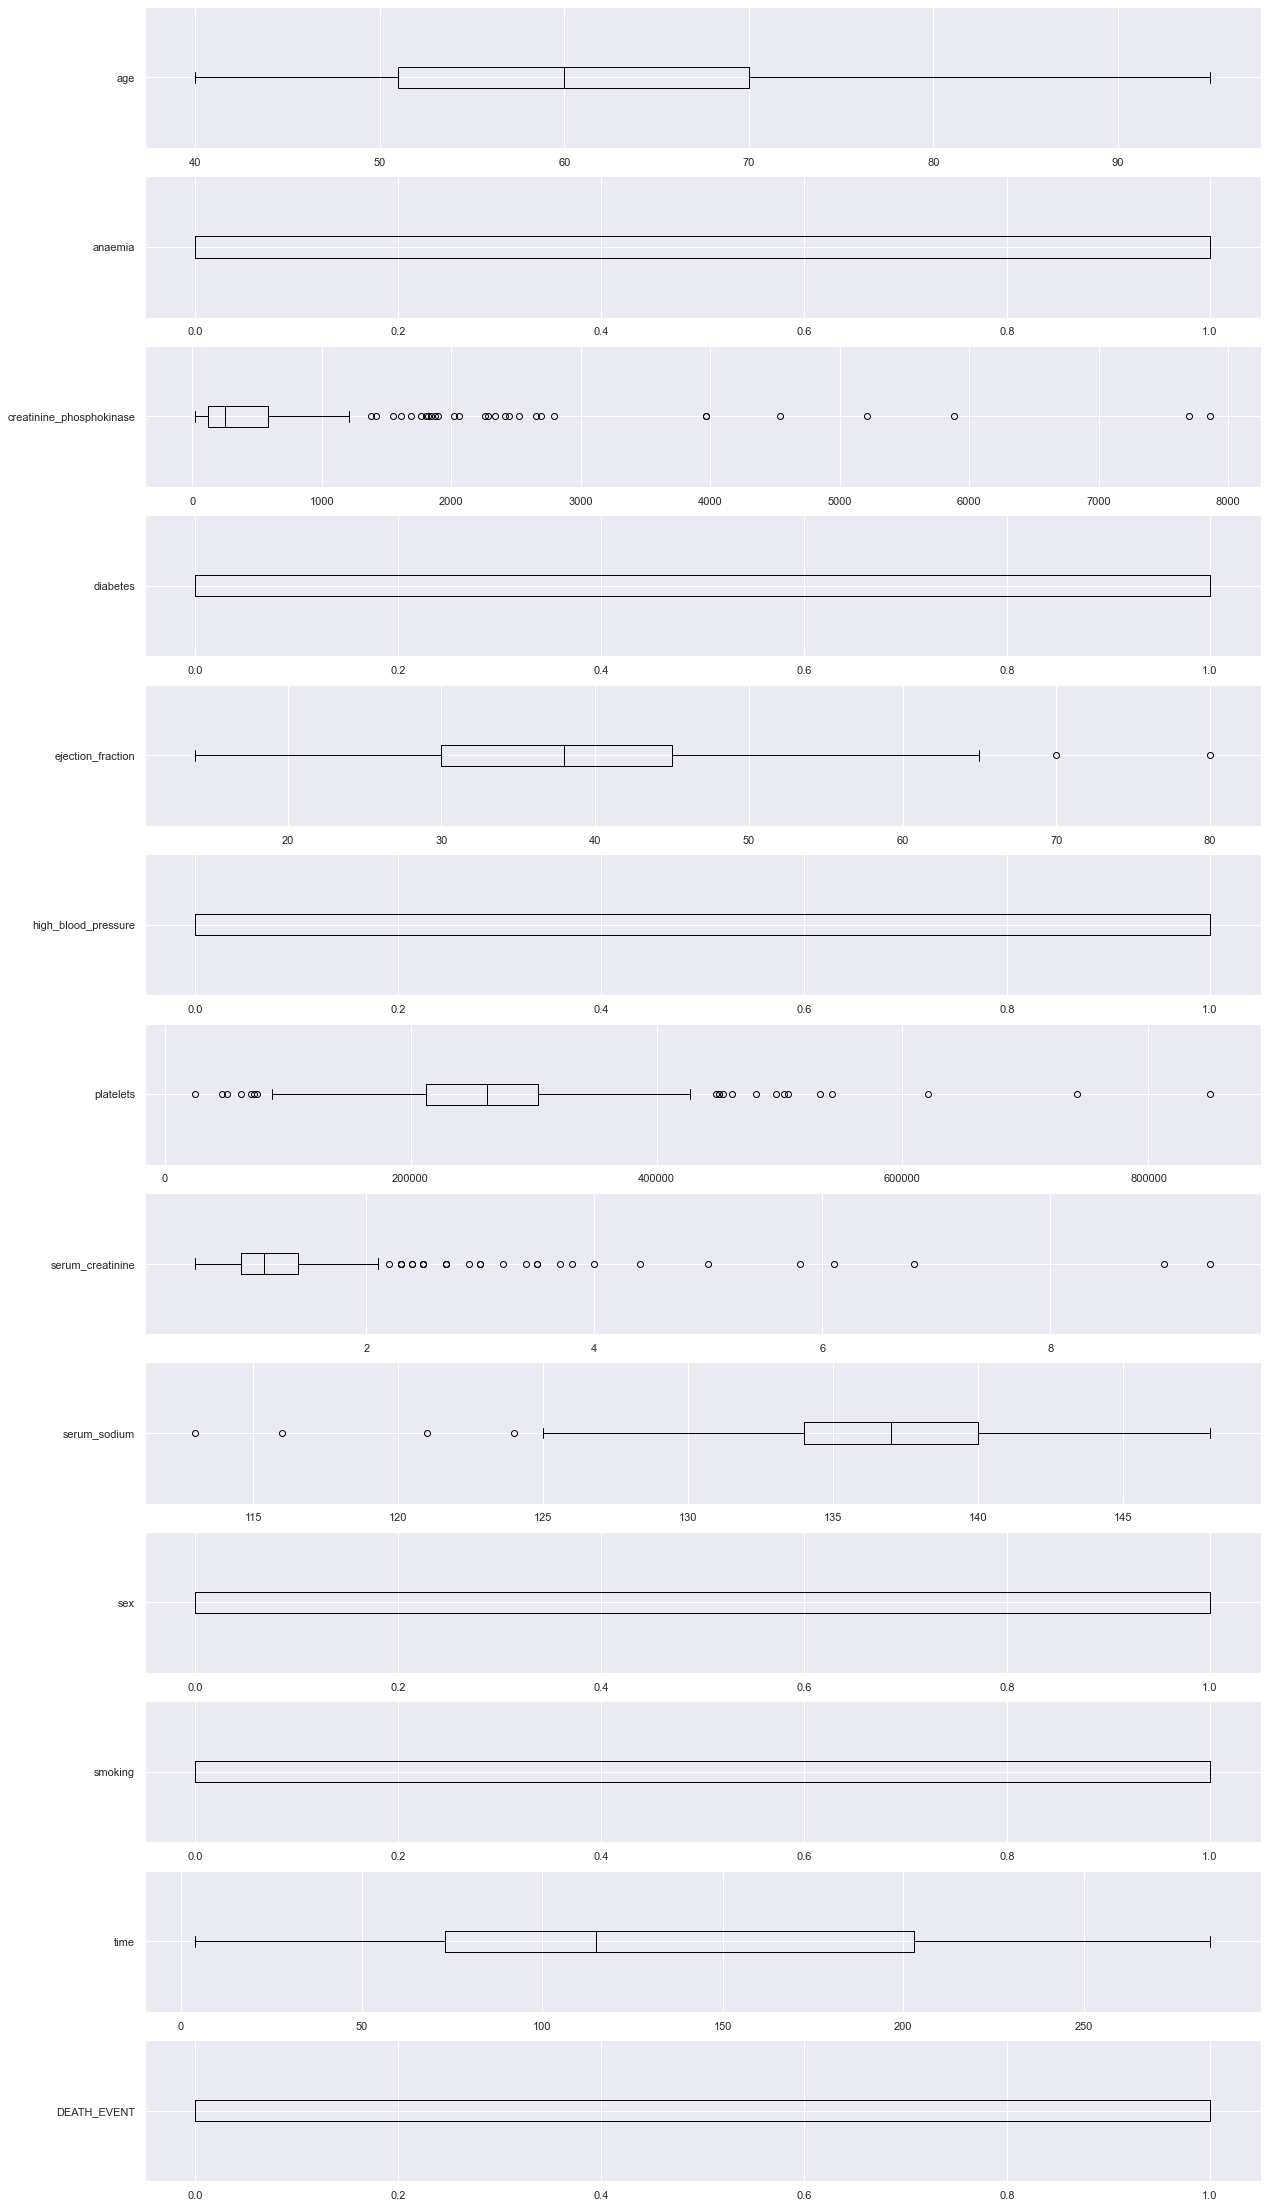

In [23]:
#check for outliers using box plot
sns.set(style="darkgrid")
fig, axes = plt.subplots(13,1,figsize=(20,40))
for i,c in enumerate(df):
    df[[c]].boxplot(ax=axes[i], vert=False, color='black')

Outlier detection was not executed due to the low size of the dataset.

# Correlation in Features 

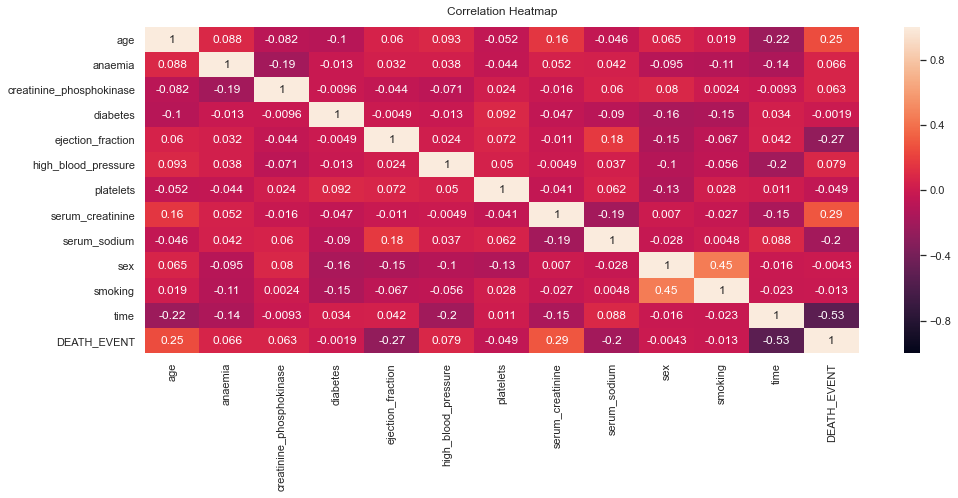

In [24]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [25]:
corr_matrix = df.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

### The heat map above shows that the largest correlation is between time (Follow-up period) and DEATH EVENT, with a value of -0.53(negative correlation). The serum creatinine, age and high_blood_pressure follow, with correlation values of 0.38, 0.25, and 0.08 with the death event, respectively.

## Paired Correlation in Features

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrplot = get_correlations(df[columns])

corrplot

sex                  smoking             0.445892
serum_creatinine     DEATH_EVENT         0.294278
age                  DEATH_EVENT         0.253729
ejection_fraction    serum_sodium        0.175902
age                  serum_creatinine    0.159187
                                           ...   
serum_sodium         DEATH_EVENT        -0.195204
high_blood_pressure  time               -0.196439
age                  time               -0.224068
ejection_fraction    DEATH_EVENT        -0.268603
time                 DEATH_EVENT        -0.526964
Length: 78, dtype: float64

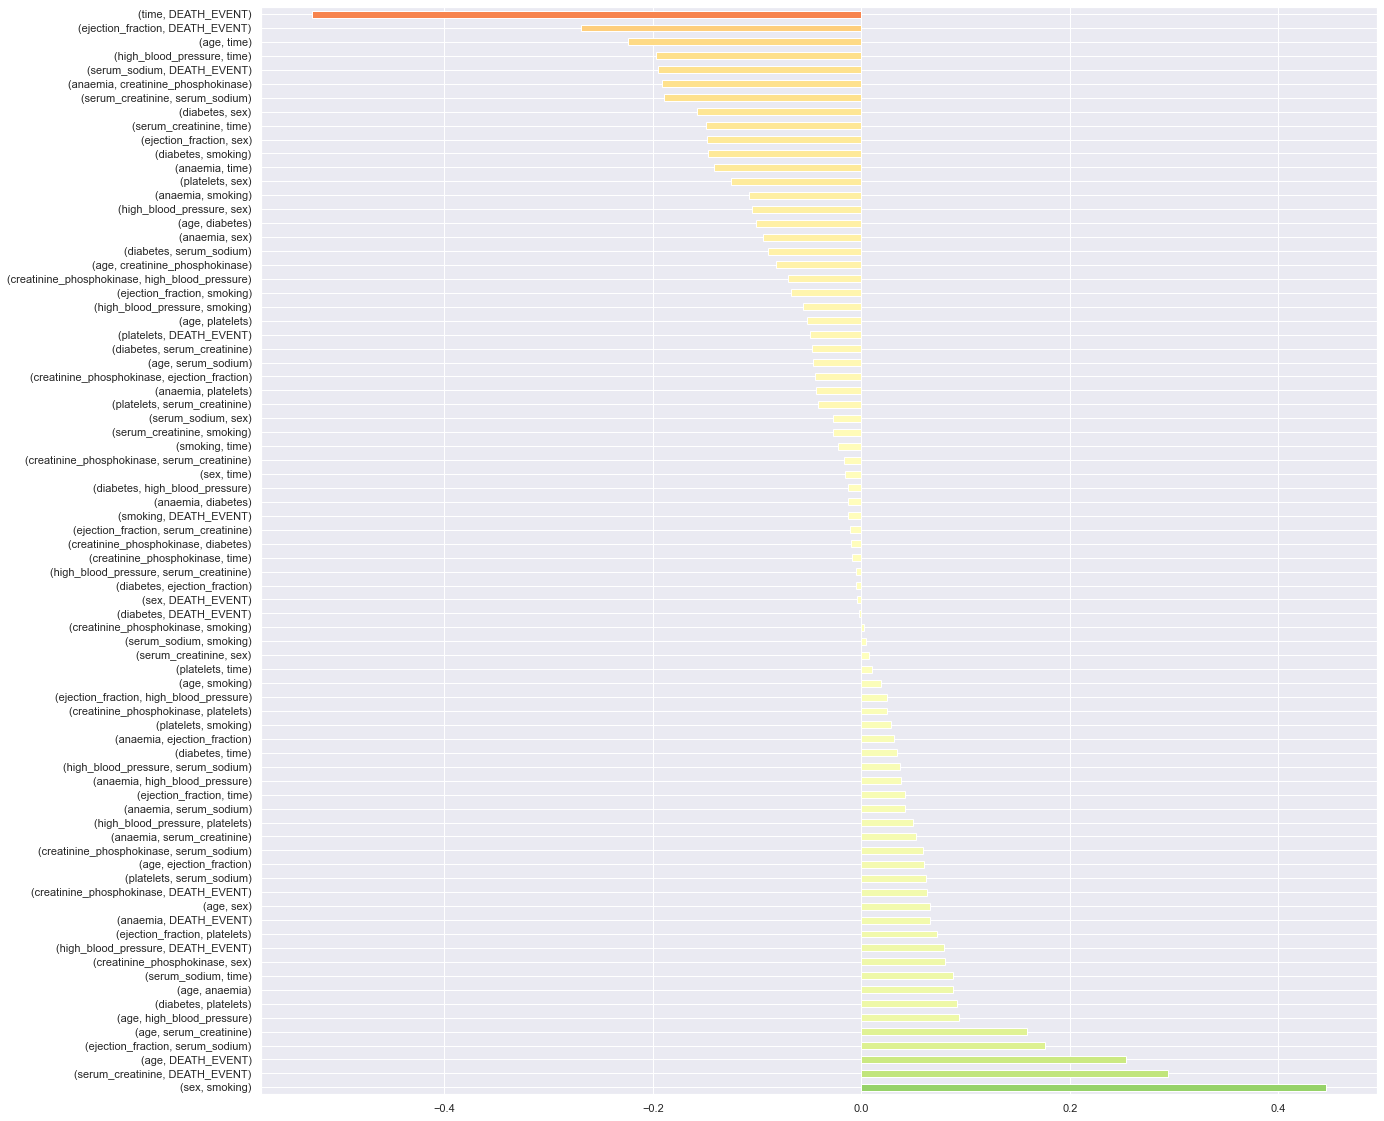

In [27]:
import matplotlib.colors as mcolors
#from matplotlib.colors import TwoSlopeNorm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize =(20,20))

norm = colors.TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

corrplot.plot.barh(color=colors)

# Split data in Test/Train

In [28]:
X = df.drop(['DEATH_EVENT'], axis = 1)
 #y is dependent variable and X is independent variable.

y = df['DEATH_EVENT']
 #Load X Variables into a Pandas Dataframe with columns 


In [29]:
#80:20 test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16, test_size=0.2)  

In [30]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (239, 12)
X_test (60, 12)
y_train (239,)
y_test (60,)


# Feature Engineering

## Chi-square Test

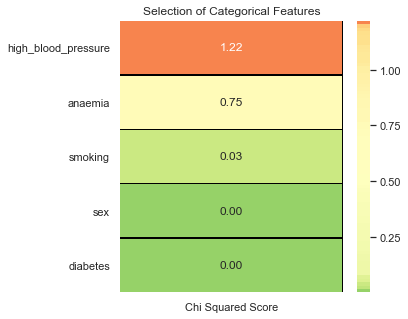

In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

features = df.loc[:,two_cat_features]
target = df.loc[:,'DEATH_EVENT']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');


## Mutual information gain

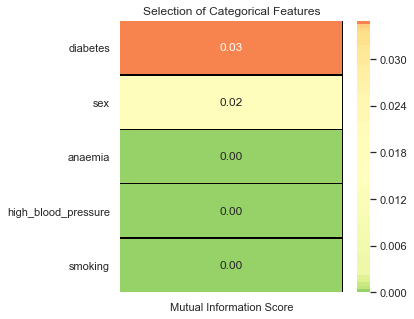

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

features = df.loc[:,two_cat_features]
target = df.loc[:,'DEATH_EVENT']

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

According to the above tests, none of the features should be selected for modeling.

# Data Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [34]:
X_train_scale = Standard_Scaler (X_train, all_features)
X_test_scale = Standard_Scaler (X_test, all_features)

# Modeling

In [35]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import seaborn as sns


In [36]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

ROC_AUC_score_list = []
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    y_proba = classifier.predict_proba(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    ROC_AUC_score_list.append(roc_auc_score(y_test,prediction))
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', linestyle="dashed")
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))
    
    
acu_report_list = []    
def accuracy_report(classifier,x_test,y_test):
    acu_report = accuracy_score(y_test,classifier.predict(x_test))
    acu_report_list.append(acu_report)
    return acu_report
    

## XGBoost Classifier

In [37]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  88.36%
ROC_AUC Score :  84.82%


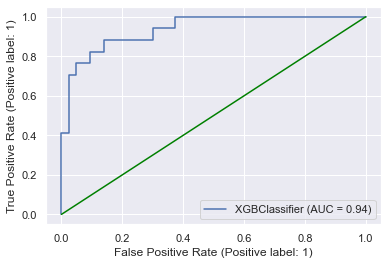

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.65      0.88      0.75        17

    accuracy                           0.83        60
   macro avg       0.80      0.85      0.81        60
weighted avg       0.86      0.83      0.84        60

accuracy: 0.833


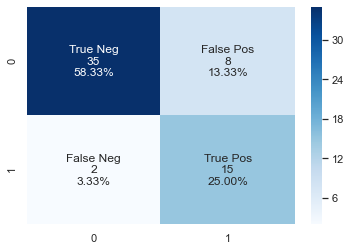

In [38]:
model(classifier_xgb,X_train,y_train,X_test,y_test)
model_evaluation(classifier_xgb,X_test,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_xgb,X_test,y_test))

# SMOTE

In [39]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [40]:
over = SMOTE()

X1, y1 = over.fit_resample(X,y)
X1.shape, y1.shape

((406, 12), (406,))

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=16, test_size=0.2)  

## Grid Scearch XGB

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [44]:
parameters = {
    'max_depth': range (3, 10, 2),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
}

In [45]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='accuracy',
    n_jobs = 4,
    cv = 5,
    verbose=True
)

In [46]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy', verbose=True)

In [47]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

### Grid Serach with SMOTE data

In [48]:
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy', verbose=True)

In [49]:
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)


In [50]:
classifier_xgb_hyp = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None)

## XGBoost Classifier with hypertune

Cross Validation Score :  89.71%
ROC_AUC Score :  88.30%


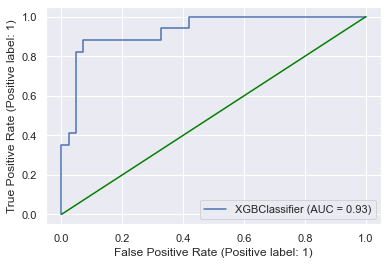

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.75      0.88      0.81        17

    accuracy                           0.88        60
   macro avg       0.85      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60

accuracy:0.883


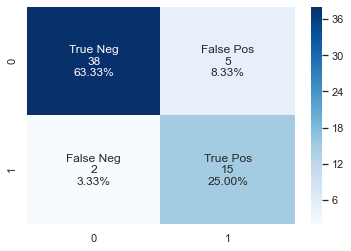

In [51]:
model(classifier_xgb_hyp,X_train_scale,y_train,X_test_scale,y_test)
model_evaluation(classifier_xgb_hyp,X_test_scale,y_test)
print('accuracy:%.3f' % accuracy_report(classifier_xgb_hyp,X_test_scale,y_test))

## XGBoost Classifier with hypertune and SMOTE

In [52]:
classifier_xgb_hyp_SMOTE = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None)

Cross Validation Score :  94.05%
ROC_AUC Score :  87.86%


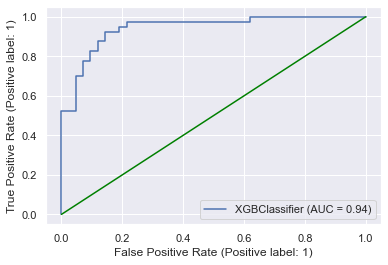

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.86      0.90      0.88        40

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82

accuracy:0.878


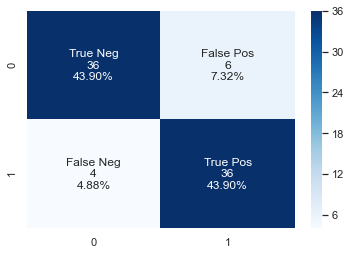

In [53]:
model(classifier_xgb_hyp_SMOTE,X1_train,y1_train,X1_test,y1_test)
model_evaluation(classifier_xgb_hyp_SMOTE,X1_test,y1_test)
print('accuracy:%.3f' % accuracy_report(classifier_xgb_hyp_SMOTE,X1_test,y1_test))

## Logistic Regression Classifier

Cross Validation Score :  85.01%
ROC_AUC Score :  86.53%


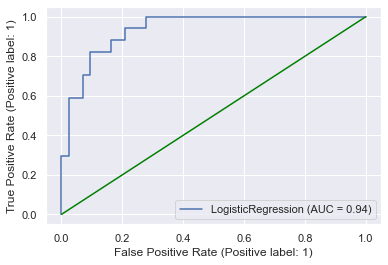

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60

accuracy: 0.883


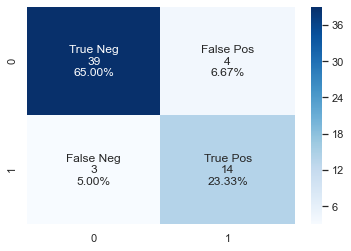

In [54]:
classifier_lg = LogisticRegression()
model(classifier_lg,X_train,y_train,X_test,y_test)
model_evaluation(classifier_lg,X_test,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_lg,X_test,y_test))

In [55]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
clf_GS = GridSearchCV(pipe, parameters, scoring='accuracy')
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]},
             scoring='accuracy')

In [56]:
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

LogisticRegression(C=0.3906939937054613)


### Grid Serach with SMOTE data

In [57]:
clf_GS.fit(X1_train, y1_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]},
             scoring='accuracy')

In [58]:
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

LogisticRegression(C=0.3906939937054613)


## Logistic Regression Classifier with Hypertune

Cross Validation Score :  85.53%
ROC_AUC Score :  86.53%


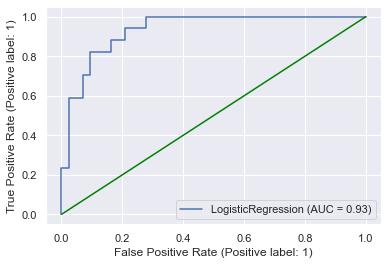

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60

accuracy: 0.883


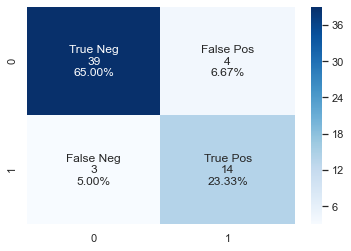

In [59]:
classifier_lg_hyp = LogisticRegression(C=0.18420699693267145)
model(classifier_lg_hyp,X_train_scale,y_train,X_test_scale,y_test)
model_evaluation(classifier_lg_hyp,X_test_scale,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_lg_hyp,X_test_scale,y_test))

## Logistic Regression Classifier with Hypertune and SMOTE

Cross Validation Score :  86.09%
ROC_AUC Score :  81.79%


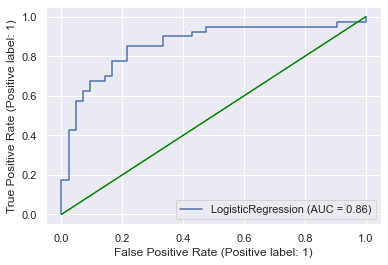

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.79      0.85      0.82        40

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82

accuracy: 0.817


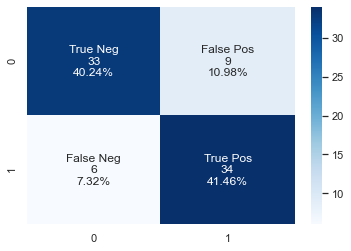

In [60]:
classifier_lg_hyp_smote = LogisticRegression(C=0.013257113655901081)
model(classifier_lg_hyp_smote,X1_train,y1_train,X1_test,y1_test)
model_evaluation(classifier_lg_hyp_smote,X1_test,y1_test)
print('accuracy: %.3f' % accuracy_report(classifier_lg_hyp_smote,X1_test,y1_test))

## Decision Tree Classifier

Cross Validation Score :  72.77%
ROC_AUC Score :  77.77%


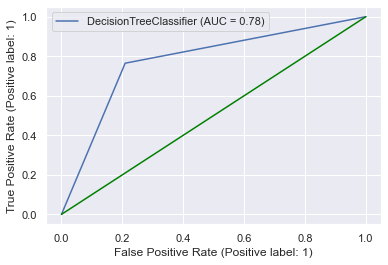

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.59      0.76      0.67        17

    accuracy                           0.78        60
   macro avg       0.74      0.78      0.75        60
weighted avg       0.81      0.78      0.79        60

accuracy: 0.783


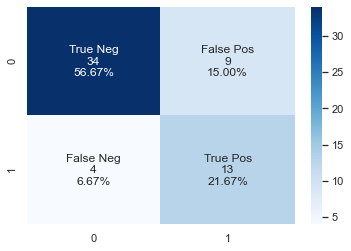

In [61]:
classifier_dt = DecisionTreeClassifier(random_state=0)
model(classifier_dt,X_train,y_train,X_test,y_test)
model_evaluation(classifier_dt,X_test,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_dt,X_test,y_test))

In [62]:
params_dt = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=42)

In [63]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params_dt, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [64]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 338 ms, sys: 96.7 ms, total: 435 ms
Wall time: 2.99 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [65]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

### Grid Serach with SMOTE data

In [66]:
grid_search.fit(X1_train, y1_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [67]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

## Decision Tree Classifier with Hypertune

Cross Validation Score :  85.12%
ROC_AUC Score :  79.48%


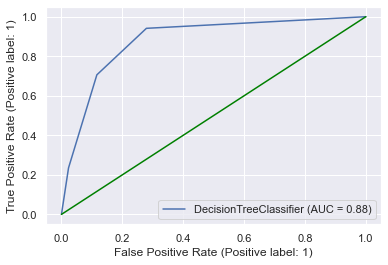

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.71      0.71      0.71        17

    accuracy                           0.83        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.83      0.83      0.83        60

accuracy: 0.833


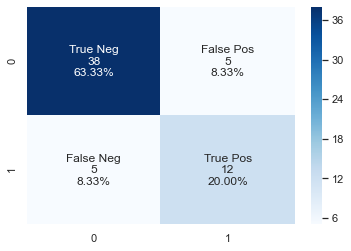

In [68]:
classifier_dt_hyp = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42, criterion='gini')
model(classifier_dt_hyp,X_train_scale,y_train,X_test_scale,y_test)
model_evaluation(classifier_dt_hyp,X_test_scale,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_dt_hyp,X_test_scale,y_test))

## Decision Tree Classifier with Hypertune and SMOTE

Cross Validation Score :  88.62%
ROC_AUC Score :  83.10%


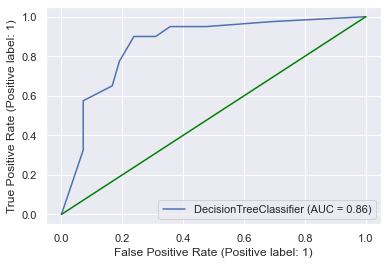

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.78      0.90      0.84        40

    accuracy                           0.83        82
   macro avg       0.84      0.83      0.83        82
weighted avg       0.84      0.83      0.83        82

accuracy: 0.829


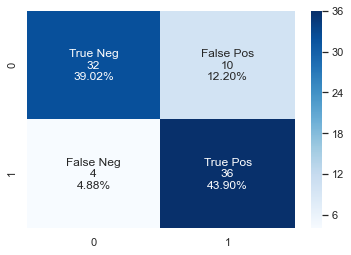

In [69]:
classifier_dt_hyp_SMOTE = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)
model(classifier_dt_hyp_SMOTE,X1_train,y1_train,X1_test,y1_test)
model_evaluation(classifier_dt_hyp_SMOTE,X1_test,y1_test)
print('accuracy: %.3f' % accuracy_report(classifier_dt_hyp_SMOTE,X1_test,y1_test))

## Random Forest Classifier

Cross Validation Score :  89.67%
ROC_AUC Score :  88.30%


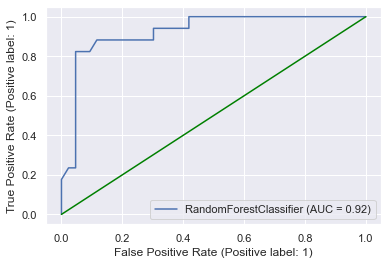

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.75      0.88      0.81        17

    accuracy                           0.88        60
   macro avg       0.85      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60

accuracy: 0.883


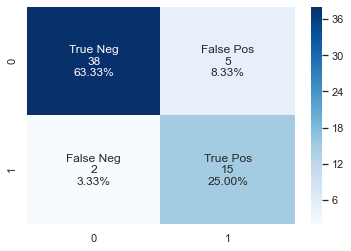

In [70]:
classifier_rf = RandomForestClassifier()
model(classifier_rf,X_train,y_train,X_test,y_test)
model_evaluation(classifier_rf,X_test,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_rf,X_test,y_test))

In [71]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             scoring='accuracy', verbose=2)

In [72]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=1250)

### Grid Serach with SMOTE data

In [73]:
grid_search.fit(X1_train,y1_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             scoring='accuracy', verbose=2)

In [74]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=1300)

## Random Forest Classifier with Hypertune

Cross Validation Score :  91.22%
ROC_AUC Score :  90.63%


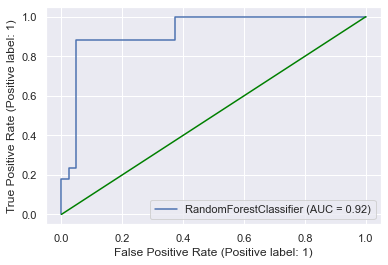

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.83      0.88      0.86        17

    accuracy                           0.92        60
   macro avg       0.89      0.91      0.90        60
weighted avg       0.92      0.92      0.92        60

accuracy: 0.917


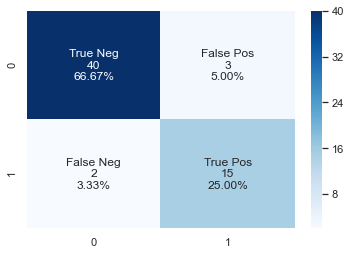

In [75]:
classifier_rf_hyp = RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=1300)
model(classifier_rf_hyp,X_train_scale,y_train,X_test_scale,y_test)
model_evaluation(classifier_rf_hyp,X_test_scale,y_test)
print('accuracy: %.3f' % accuracy_report(classifier_rf_hyp,X_test_scale,y_test))

## Random Forest Classifier with Hypertune and SMOTE

Cross Validation Score :  95.21%
ROC_AUC Score :  90.36%


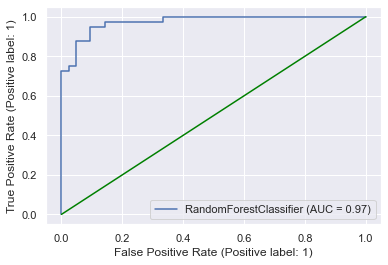

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.86      0.95      0.90        40

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82

accuracy: 0.902


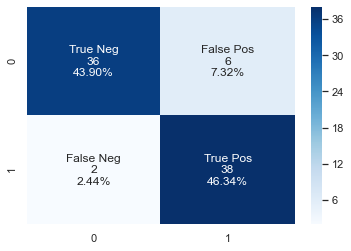

In [76]:
classifier_rf_hyp_SMOTE = RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=1250)
model(classifier_rf_hyp_SMOTE,X1_train,y1_train,X1_test,y1_test)
model_evaluation(classifier_rf_hyp_SMOTE,X1_test,y1_test)
print('accuracy: %.3f' % accuracy_report(classifier_rf_hyp_SMOTE,X1_test,y1_test))

# Model Evaluation 

In [77]:
Model_list = ['XGB', 'XGB-Hyp', 'XGB-Hyp-SMOTE','Logistic Regression ', 'Logistic Regression-Hyp', 'Logistic Regression-Hyp-SMOTE','Decision Tree', 'Decision Tree-Hyp', 'Decision Tree-Hyp-SMOTE','Random Forest', 'Random Forest-Hyp', 'Random Forest-Hyp-SMOTE']


In [78]:
ROC_AUC_score_list

[0.8481532147742818,
 0.8830369357045144,
 0.8785714285714286,
 0.8652530779753762,
 0.8652530779753762,
 0.8178571428571428,
 0.7777017783857728,
 0.7948016415868674,
 0.8309523809523808,
 0.8830369357045144,
 0.9062927496580028,
 0.9035714285714286]

In [79]:
len(acu_report_list)

12

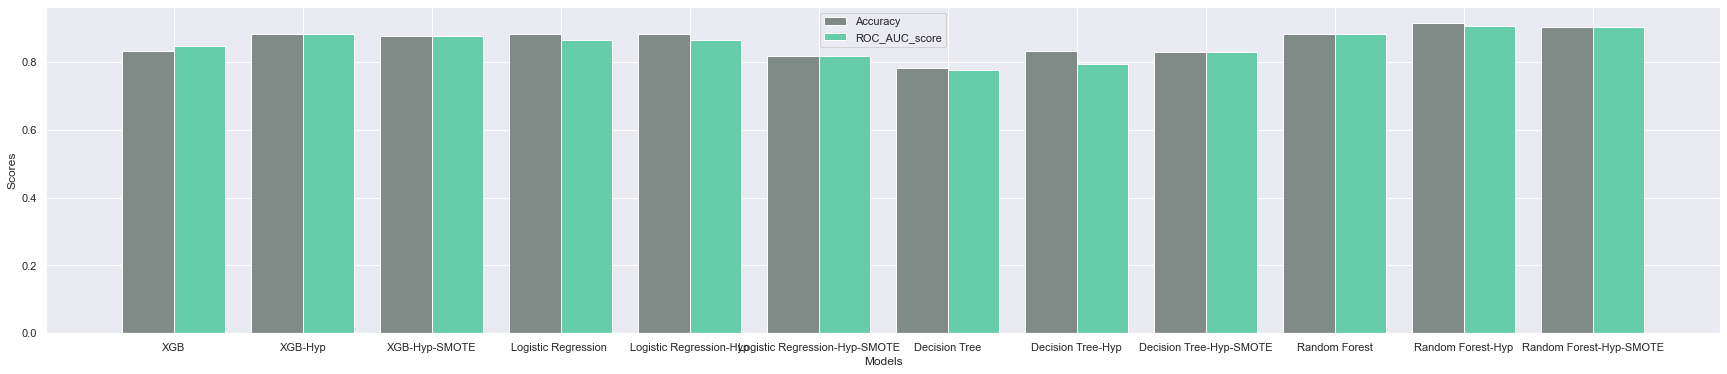

In [80]:
x = np.arange(len(acu_report_list))
y1 = acu_report_list
y2 = ROC_AUC_score_list
width = 0.4
plt.figure(figsize=(30, 6))
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='#808A87')
plt.bar(x+0.2, y2, width, color='#66CDAA')
plt.xticks(x, Model_list)
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "ROC_AUC_score"])
plt.show()

In [81]:
analysis_original_compare = pd.DataFrame({
    'Model':Model_list,
    'Accuracy_score' :acu_report_list,
    'ROC_AUC_score': ROC_AUC_score_list
})
analysis_original_compare
#sns.barplot(x='Recall_score', y='Model', data=analysis_original_compare)

analysis_original_compare.sort_values(by='Accuracy_score', ascending=False)

Model  Accuracy_score  ROC_AUC_score
10              Random Forest-Hyp        0.916667       0.906293
11        Random Forest-Hyp-SMOTE        0.902439       0.903571
1                         XGB-Hyp        0.883333       0.883037
3            Logistic Regression         0.883333       0.865253
4         Logistic Regression-Hyp        0.883333       0.865253
9                   Random Forest        0.883333       0.883037
2                   XGB-Hyp-SMOTE        0.878049       0.878571
0                             XGB        0.833333       0.848153
7               Decision Tree-Hyp        0.833333       0.794802
8         Decision Tree-Hyp-SMOTE        0.829268       0.830952
5   Logistic Regression-Hyp-SMOTE        0.817073       0.817857
6                   Decision Tree        0.783333       0.777702

# Interpretation/Explanation 

## ELI5
### 3_A) Use the 'eli5' library to interpret the "white box" model of Logistic Regression. Apply 'eli5' to visualize the weights associated to each feature. Use 'eli5' to explain specific predictions, pick a row in the test data with negative label and one with positive.

In [82]:
import eli5
eli5.explain_weights(classifier_lg,feature_names = list(X.columns)) # lg is the model fitted 

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='serum_creatinine', weight=0.6730171032311539, std=None, value=None), FeatureWeight(feature='age', weight=0.5520293555877164, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=0.2743732984437218, std=None, value=None), FeatureWeight(feature='smoking', weight=0.03887733734643362, std=None, value=None), FeatureWeight(feature='diabetes', weight=0.025909336858388435, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.004588099802248238, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.000593807222945237, std=None, value=None)], neg=[FeatureWeight(feature='time', weight=-1.4160627268221302, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-1.1593291148490257, std=None, value=None), FeatureWeight(feature='ejection_fraction', weight=-0.8492290974471493, std=None, value=None), FeatureWeight(feature='sex', weight=-0.28438622916139095, std=None, value=None), FeatureWeight(feature='platelets', weight=-0.2311968485134596, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=-0.21253208577423385, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

That gives us the weights associated to each feature, that can be seen as the contribution of each feature into predicting that the class will be y=1 (a patient can encounter a death situation due to heart failure).


### We can also use eli5 to explain a specific prediction, let's pick a row in the test data

In [83]:
i = 4
X_test.iloc[[i]]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
295 -0.56912 -0.78843                  1.006437 -0.733799          -0.081731  \

     high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex   
295            -0.733799    0.18875         -0.127299      0.749165 -1.590412  \

      smoking      time  
295 -0.707107  1.524411

In [84]:
y_test.iloc[i]

0

In [85]:
eli5.show_prediction(classifier_lg, X_test.iloc[i], feature_names = list(X.columns),show_feature_values=True) 

In [86]:
i = -11
X_test.iloc[[i]]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
59  0.780885 -0.78843                 -0.228254   1.36277          -1.482827  \

    high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex   
59              1.36277  -0.002584          0.050327     -0.058318  0.628768  \

     smoking      time  
59  1.414214 -1.033704

In [87]:
y_test.iloc[i]

1

In [88]:
eli5.show_prediction(classifier_lg, X_test.iloc[i], feature_names = list(X.columns),show_feature_values=True) 

### 3_B) Use the 'eli5' library to interpret the "white box" model of Decision Tree. Apply 'eli5' to list the feature importance ordered by the highest value. Get an explanation for a given prediction, one positive and one negative. This will calculate the contribution of each feature in the prediction. The explanation for a single prediction is calculated by following the decision path in the tree, and adding up contribution of each feature from each node crossed into the overall probability predicted.

In [89]:
eli5.explain_weights(classifier_dt,feature_names = list(X.columns)) # dt is the model fitted 

Explanation(estimator='DecisionTreeClassifier(random_state=0)', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='time', weight=0.4958526794032615, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.1610421859309282, std=None, value=None), FeatureWeight(feature='age', weight=0.08328168090372584, std=None, value=None), FeatureWeight(feature='platelets', weight=0.06646550117382062, std=None, value=None), FeatureWeight(feature='ejection_fraction', weight=0.06072736683879019, std=None, value=None), FeatureWeight(feature='diabetes', weight=0.03646586799276673, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=0.035196072082760634, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.02566116636528029, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.01654469936708861, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.009454113924050633, std=None, value=None), FeatureWeight(feature='smoking', weight=0.009308666017526779, std=None, value=None), FeatureWeight(feature='sex', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[160.0, 79.0], value_ratio=[0.6694560669456067, 0.3305439330543933], impurity=0.4425692827506521, samples=239, sample_ratio=1.0, feature_name='time', feature_id=11, threshold=-0.7025789618492126, left=NodeInfo(id=1, is_leaf=False, value=[9.0, 51.0], value_ratio=[0.15, 0.85], impurity=0.255, samples=60, sample_ratio=0.2510460251046025, feature_name='ejection_fraction', feature_id=4, threshold=-0.8969756960868835, left=NodeInfo(id=2, is_leaf=True, value=[0.0, 19.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=19, sample_ratio=0.0794979079497908, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=3, is_leaf=False, value=[9.0, 32.0], value_ratio=[0.21951219512195122, 0.7804878048780488], impurity=0.34265318262938727, samples=41, sample_ratio=0.17154811715481172, feature_name='time', feature_id=11, threshold=-0.9868132770061493, left=NodeInfo(id=4, is_leaf=False, value=[5.0, 29.0], value_ratio=[0.14705882352941177, 0.8529411764705882], impurity=0.25086505190311414, samples=34, sample_ratio=0.14225941422594143, feature_name='age', feature_id=0, threshold=-0.4714795649051666, left=NodeInfo(id=5, is_leaf=False, value=[3.0, 4.0], value_ratio=[0.42857142857142855, 0.5714285714285714], impurity=0.4897959183673469, samples=7, sample_ratio=0.029288702928870293, feature_name='platelets', feature_id=6, threshold=0.23179152235388756, left=NodeInfo(id=6, is_leaf=True, value=[0.0, 3.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=3, sample_ratio=0.012552301255230125, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=7, is_leaf=False, value=[3.0, 1.0], value_ratio=[0.75, 0.25], impurity=0.375, samples=4, sample_ratio=0.016736401673640166, feature_name='serum_creatinine', feature_id=7, threshold=0.11218978464603424, left=NodeInfo(id=8, is_leaf=True, value=[3.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=3, sample_ratio=0.012552301255230125, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=9, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=0.0041841004184100415, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), right=NodeInfo(id=10, is_leaf=False, value=[2.0, 25.0], value_ratio=[0.07407407407407407, 0.9259259259259259], impurity=0.13717421124828533, samples=27, sample_ratio=0.11297071129707113, feature_name='creatinine_phosphokinase', feature_id=2, threshold=1.3071891069412231, left=NodeInfo(id=11, is_leaf=False, value=[1.0, 24.0]

Here is a portion of the decision tree with feature weights.
Suppose if we wish to debug and check how the outcome has been predicted for a particular row. We can use explain_prediction().

As can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output. If you further wish to see and compare what combination of features and values lead to a particular prediction, we can use show_prediction().

In [90]:
eli5.show_weights(classifier_dt, feature_names = list(X.columns),
             show=["feature_importances"])

In [91]:
eli5.show_weights(classifier_dt, feature_names = list(X.columns),
             show=["decision_tree", "method", "description"])

In [92]:
i = 1
eli5.show_prediction(classifier_dt, X_test.iloc[i], feature_names = list(X.columns),show_feature_values=True) 

In [93]:
i = -1
eli5.show_prediction(classifier_dt, X_test.iloc[i], feature_names = list(X.columns),show_feature_values=True) 

In ELI5, a prediction is basically the sum of positive features inclusive of bias.

### 3_C) Use LIME to explain both the Random Forest and the XGBoost models. Create a LIME explainer by using the LimeTabularExplainer method, the main explainer to use for tabular data. LIME fits a linear model on a local shuffled dataset. Access the coefficients, the intercept and the R 2 of the linear model, for both model interpretability. Note: If R2 is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

In [94]:
#!pip install lime

In [95]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test),
                                                   feature_names=X_test.columns)

In [96]:
# storing a new observation
i = 6
X_observation = X_test.iloc[[i], :]
X_observation

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
277  0.622061 -0.78843                 -0.043389   1.36277          -0.081731  \

     high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex   
277            -0.733799  -2.739851         -0.304925      1.018326  0.628768  \

      smoking      time  
277 -0.707107  1.222747

In [97]:
classifier_xgb_hyp.predict_proba(X_observation)[0,1]

0.14565937

Now that we have generated our explanation, we have access to several representations. The most useful one when working in a notebook is show_in_notebook.

- On the left it shows the list of probabilities for each class, here the model classified our observation as 0 (non subsribed) with a high probability.

- If you set show_table=True, you will see the table with the most important features for this observation on the right.

In [98]:
# explanation using the Randon forest model
explanation_rf = explainer.explain_instance(X_observation.values[0], classifier_rf.predict_proba)
explanation_rf.show_in_notebook(show_table=True, show_all=False)
print("R-squared ",explanation_rf.score)

R-squared  0.17549730355695503


LIME is fitting a linear model on a local perturbated dataset. You can access the coefficients, the intercept and the R squared of the linear model by calling respectively .local_exp, .intercept and .score on your explanation.

In [99]:
print(explanation_rf.local_exp)

{1: [(11, -0.2215840639296941), (6, 0.05917522522038359), (4, -0.052291088131186804), (7, -0.039314262863241474), (8, -0.019148424664649968), (0, -0.017225447306706724), (1, -0.014001355608132765), (2, -0.012484844684721198), (3, -0.011242988892777821), (9, 0.007407555373033975)]}


In [100]:
print(explanation_rf.intercept)

{1: 0.4646254175132848}


In [101]:
print(explanation_rf.score)

0.17549730355695503


If your R-squared is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

In [102]:
# explanation using the XgBoost model
explanation_xgb = explainer.explain_instance(X_observation.values[0], classifier_xgb.predict_proba)
explanation_xgb.show_in_notebook(show_table=True, show_all=False)
print('R-squared',explanation_xgb.score)

R-squared 0.19564846442035544


In [103]:
#coefficient 
print(explanation_xgb.local_exp)

{1: [(11, -0.3249338173205262), (6, 0.08546965485467517), (4, -0.06480475814777105), (0, -0.03486768181093352), (3, -0.025620748964694674), (2, -0.024815848679728053), (8, -0.016059630874993548), (7, -0.006738079902509653), (10, 0.0021858107513238055), (9, -0.000843994696344808)]}


In [104]:
#intercept
print(explanation_xgb.intercept)

{1: 0.4916521279503528}


In [105]:
print(explanation_xgb.score)

0.19564846442035544


### 3_D) Use SHAP library to interpret the XGBoost model. Specifically, call the TreeExplainer method of SHAP, TreeExplainer is optimized for tree based models. Visualize your explanations, one for positive and one for negative, using the ‘force_plot’ function. Note; You need to establish a ‘base value’ in order to be used by ‘force_plot’. The explainer.expected_value is the ‘base value’. Create the feature importance plot by calling SHAP’s ‘summary_plot’ function, for each class/label.

In [106]:
#!pip install catboost

In [107]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

SHAP has a generic explainer that works for any model and a TreeExplainer optimised for tree based models. Here we will focus on the TreeExplainer with our XGB model

In [108]:

explainer = shap.TreeExplainer(classifier_xgb)
shap_values = explainer(X_test)

shap_values.shape

(60, 12)

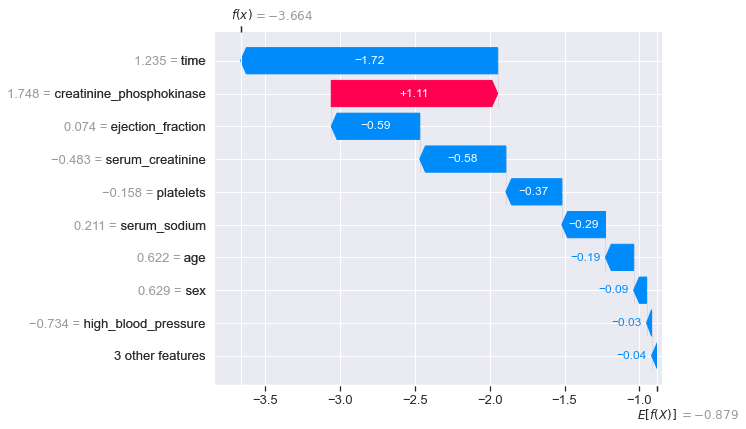

In [109]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

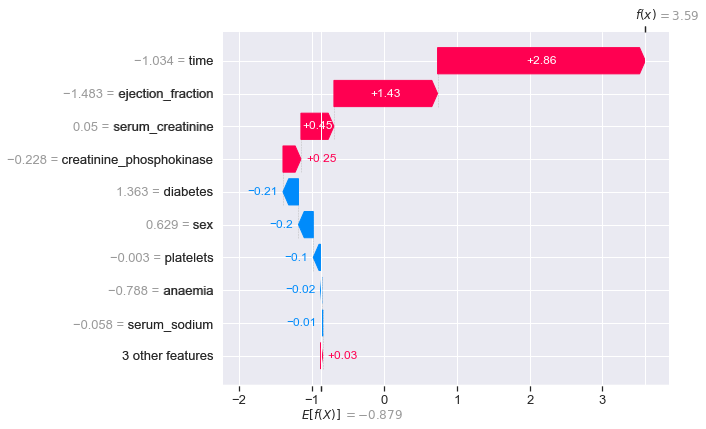

In [110]:
# Waterfall plot for last observation
shap.plots.waterfall(shap_values[-11])

In [111]:
base_value = explainer.expected_value

In [112]:
# Forceplot for first observation
shap.force_plot(base_value, shap_values.values[0],X_test.iloc[0], plot_cmap="DrDb",feature_names=all_features)

In [123]:
# Forceplot for last observation
shap.force_plot(base_value, shap_values.values[-5],X_test.iloc[-5], plot_cmap="DrDb",feature_names=all_features)


In [114]:
shap.force_plot(explainer.expected_value, shap_values.values[0:5,:],X_test.iloc[0:5,:], plot_cmap="DrDb",feature_names=all_features)

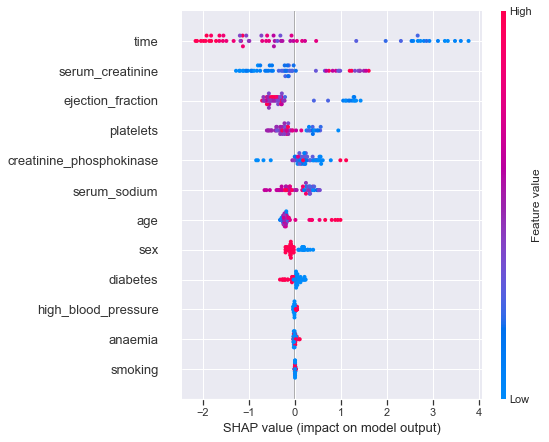

In [115]:
shap.summary_plot(shap_values)

### 4) Predict observations, one for positive and one for negative label, by using all four (4) models and indicate which one gives the better prediction. Provide output for showing the accuracy of each model as follows: False/True label: 0/1 (or 0/1 depending how you define labels)
### * LR: [prob_T prob_F]
### * DT: [prob_T prob_F]
### * RF: [prob_T prob_F]
### * XGB: [prob_T prob_F]
### The above calculations are derived by calling the predict_proba method.
### Note: predict_proba(X): Predict class probabilities for X.

In [116]:
i = 4
X_observation = X_test.iloc[[i], :]
X_observation

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
295 -0.56912 -0.78843                  1.006437 -0.733799          -0.081731  \

     high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex   
295            -0.733799    0.18875         -0.127299      0.749165 -1.590412  \

      smoking      time  
295 -0.707107  1.524411

In [117]:
#return probability of calssification label
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {classifier_lg_hyp.predict_proba(X_observation)[0]}
* DT: {classifier_dt_hyp.predict_proba(X_observation)[0]}
* RF: {classifier_rf_hyp.predict_proba(X_observation)[0]}
* XGB: {classifier_xgb_hyp.predict_proba(X_observation)[0]}""")

* True label: 0
* LR: [0.93977192 0.06022808]
* DT: [0.92253521 0.07746479]
* RF: [0.92120372 0.07879628]
* XGB: [0.8947308 0.1052692]


In [118]:
#results with predict() function
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {classifier_lg_hyp.predict(X_observation)[0]}
* DT: {classifier_dt_hyp.predict(X_observation)[0]}
* RF: {classifier_rf_hyp.predict(X_observation)[0]}
* XGB: {classifier_xgb_hyp.predict(X_observation)[0]}""")

* True label: 0
* LR: 0
* DT: 0
* RF: 0
* XGB: 0


In [119]:
i = 1
X_observation = X_test.iloc[[i], :]
X_observation

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
12 -1.36324  1.268344                  0.294963 -0.733799           -0.70444  \

    high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex   
12            -0.733799  -1.413669         -0.304925      0.210843  0.628768  \

     smoking      time  
12 -0.707107 -1.612899

In [120]:
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {classifier_lg_hyp.predict_proba(X_observation)[0]}
* DT: {classifier_dt_hyp.predict_proba(X_observation)[0]}
* RF: {classifier_rf_hyp.predict_proba(X_observation)[0]}
* XGB: {classifier_xgb_hyp.predict_proba(X_observation)[0]}""")

* True label: 1
* LR: [0.34808708 0.65191292]
* DT: [0.2195122 0.7804878]
* RF: [0.38332457 0.61667543]
* XGB: [0.45899183 0.5410082 ]


In [121]:
#results with predict() function
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {classifier_lg_hyp.predict(X_observation)[0]}
* DT: {classifier_dt_hyp.predict(X_observation)[0]}
* RF: {classifier_rf_hyp.predict(X_observation)[0]}
* XGB: {classifier_xgb_hyp.predict(X_observation)[0]}""")

* True label: 1
* LR: 1
* DT: 1
* RF: 1
* XGB: 1


# Conclusion

- At the end We can conclude that Random Forect with Hyperparameter tuning performed best among all four models with the accuracy of 91%
- Also we performed many white box interpretation techniques to understand how the Probabilitis are drawn out and impact of features behind the results with madels.